In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

C:\Users\Monika\AppData\Local\Temp\ipykernel_27280\2524398245.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
url="https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2023)"
table_attribs = ['Title','Genre','Premiere','Runtime','Language']

In [3]:
def extract(url, table_attribs):
    html_page = requests.get(url).text
    data = BeautifulSoup(html_page,'html.parser')
    table = data.find_all('tbody')
    rows = table[0].find_all('tr')
    df = pd.DataFrame(columns=table_attribs)
    for row in rows:
        cols = row.find_all('td')
        if cols:
          title_tags = cols[0].find_all('a')
          genre_tags = cols[1].find_all('a')
          if title_tags and genre_tags:
            title_value = title_tags[0].get('title','')
            genre_value = genre_tags[0].get('title','')  # Extract text content of the first <a> tag
            runtime_hr = cols[3].contents[0].text
            total_minutes = convert_to_minutes(runtime_hr)
            data_dict = {"Title": title_value,
                         "Genre":genre_value,
                         "Premiere":cols[2].contents[0].rstrip('\n'),
                         "Runtime":total_minutes,
                         "Language":cols[4].contents[0].rstrip('\n')}
            df1 = pd.DataFrame(data_dict, index=[0])
            df = pd.concat([df, df1], ignore_index=True)
    return df

In [4]:
def convert_to_minutes(duration_str):
    # Split the string by whitespace and extract hours and minutes
    parts = duration_str.split()
    hours = 0
    minutes = 0
    
    if 'h' in parts:
        hours_index = parts.index('h')
        hours = int(parts[hours_index - 1])
    if 'min' in parts:
        minutes_index = parts.index('min')
        minutes = int(parts[minutes_index - 1])

    # Calculate total duration in minutes
    total_minutes = hours * 60 + minutes
    return total_minutes

In [5]:
df = extract(url,table_attribs)

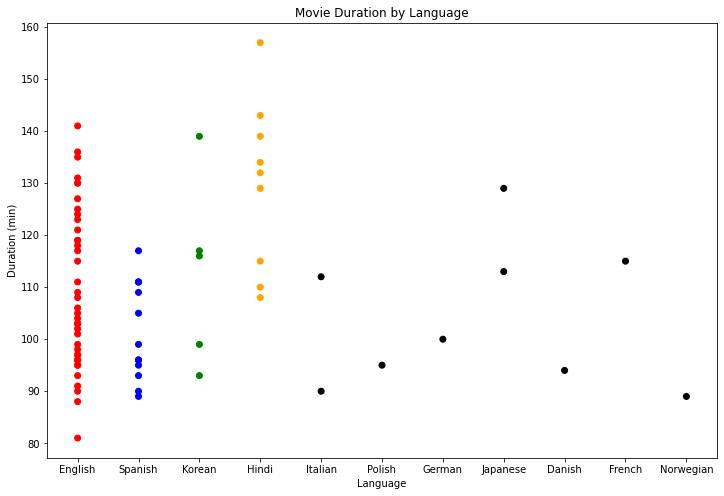

In [6]:
import matplotlib.pyplot as plt
# Define an empty list
colors = []

# Iterate over rows of netflix_movies
for label, row in df.iterrows() :
    if row["Language"] == "English" :
        colors.append("red")
    elif row["Language"] == "Spanish" :
        colors.append("blue")
    elif row["Language"] == "Korean":
        colors.append("green")
    elif row["Language"] == "Hindi":
        colors.append('orange')
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
colors[:10]

# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(df.Language, df.Runtime, c=colors)

# Create a title and axis labels
plt.title("Movie Duration by Language")
plt.xlabel("Language")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

In [ ]:
#Visual representation on the length of the movies against the language they are in 